__Triage Clustering__

In [30]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.cluster import KMeans
sns.set(style="darkgrid")

In [2]:
#reading in the dataframes for two years
df17 = pd.read_csv('../data/2017.csv')
df16 = pd.read_csv('../data/2016.csv')
df15 = pd.read_csv('../data/2015.csv')

In [3]:
df15.columns

Index(['VMONTH', 'VDAYR', 'ARRTIME', 'WAITTIME', 'LOV', 'AGE', 'AGER',
       'AGEDAYS', 'RESIDNCE', 'SEX',
       ...
       'RX30V3C1', 'RX30V3C2', 'RX30V3C3', 'RX30V3C4', 'SETTYPE', 'YEAR',
       'CSTRATM', 'CPSUM', 'PATWT', 'EDWT'],
      dtype='object', length=1031)

In [4]:
len(df16.columns) - len(df17.columns)

0

In [5]:
common_cols2 = df16.columns.intersection(df15.columns)

In [6]:
#check to see if both the years have the same columns 
common_cols = df16.columns.intersection(df17.columns)
col16_only = df16.columns.difference(df17.columns)
col17_only = df17.columns.difference(df16.columns)

In [7]:
#from documentation, these values were left blank because of data quality issues. 
col16_only

Index(['LOS', 'LOV', 'OBSSTAY', 'STAY24'], dtype='object')

In [8]:
#from documentation, these values were left blank because of data quality issues. 
col17_only

Index(['BLANK1', 'BLANK2', 'BLANK3', 'BLANK4'], dtype='object')

In [9]:
#dropping columns that do not intersect with each other 
df17 = df17.drop(col17_only, axis=1)
df16 = df16.drop(col16_only, axis = 1)

In [10]:
#combine dfs
df = pd.concat([df17,df16], ignore_index=True)

In [11]:
df.head(2)

VMONTH   VDAYR    ARRTIME WAITTIME AGE            AGER           AGEDAYS  \
0   June  Friday  8:56 p.m.       72  27     25-44 years  One year or more   
1   June  Monday  2:17 p.m.       64   1  Under 15 years  One year or more   

            RESIDNCE     SEX                   ETHUN  ...        RX30V3C1  \
0  Private residence    Male  Not Hispanic or Latino  ...  Not applicable   
1  Private residence  Female      Hispanic or Latino  ...  Not applicable   

         RX30V3C2        RX30V3C3        RX30V3C4      SETTYPE  YEAR  \
0  Not applicable  Not applicable  Not applicable  NHAMCS - ED  2017   
1  Not applicable  Not applicable  Not applicable  NHAMCS - ED  2017   

    CSTRATM CPSUM       PATWT      EDWT  
0  40100000     4  3723.12641  21.58043  
1  40100000     4  3723.12641            

[2 rows x 945 columns]

In [12]:
df.AGEDAYS.unique() 

array(['One year or more', '38', '358', '40', '350', '267', '157', '269',
       '65', '166', '132', '277', '185', '336', '283', '301', '41', '174',
       '233', '346', '12', '15', '217', '4', '197', '289', '330', '25',
       '266', '359', '81', '209', '249', '101', '254', '320', '286',
       '165', '250', '66', '242', '293', '90', '84', '323', '196', '62',
       '148', '127', '53', '162', '280', '56', '273', '265', '77', '206',
       '8', '70', '235', '64', '356', '55', '170', '43', '189', '60',
       '285', '152', '272', '302', '181', '282', '3', '9', '86', '192',
       '104', '150', '108', '33', '120', '156', '110', '99', '118', '300',
       '5', '85', '245', '317', '30', '271', '14', '29', '130', '35',
       '322', '145', '345', '39', '261', '28', '184', '268', '83', '52',
       '338', '244', '276', '7', '136', '238', '177', '226', '227', '240',
       '109', '264', '13', '45', '193', '51', '314', '225', '173', '82',
       '158', '24', '310', '353', '237', '220', '76', '

In [13]:
#df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')pd.to_numeric(df['DataFrame Column'],errors='coerce')
df.AGEDAYS= pd.to_numeric(df['AGEDAYS'],errors='coerce')

In [14]:
print(len(df.loc[df.AGE=="Under one year"]))

#changing the value of 'under one year' to AGEDAYS divided by 365. In terms of years.
df.loc[df.AGE =="Under one year", 'AGE'] = (df.AGEDAYS/365).round(2)

1023


In [15]:
#columns with AGES calculated from under one year to int value
df.loc[df.AGEDAYS.notnull()].head(3) 

VMONTH      VDAYR    ARRTIME WAITTIME   AGE            AGER  AGEDAYS  \
62        June     Sunday  2:55 p.m.       13   0.1  Under 15 years     38.0   
113  September     Sunday  1:16 p.m.       33  0.98  Under 15 years    358.0   
170  September  Wednesday  7:48 p.m.       21  0.11  Under 15 years     40.0   

              RESIDNCE     SEX                   ETHUN  ...        RX30V3C1  \
62   Private residence    Male                   Blank  ...  Not applicable   
113  Private residence    Male  Not Hispanic or Latino  ...  Not applicable   
170  Private residence  Female      Hispanic or Latino  ...  Not applicable   

           RX30V3C2        RX30V3C3        RX30V3C4      SETTYPE  YEAR  \
62   Not applicable  Not applicable  Not applicable  NHAMCS - ED  2017   
113  Not applicable  Not applicable  Not applicable  NHAMCS - ED  2017   
170  Not applicable  Not applicable  Not applicable  NHAMCS - ED  2017   

      CSTRATM   CPSUM        PATWT EDWT  
62   40100000       4   3723.12641       
113  20117201  100018  26213.70117       
170  20117201  100018  26213.70117       

[3 rows x 945 columns]

In [16]:
#under one years admitted to hospital data.
df.loc[df.AGEDAYS.notnull()].groupby('ADMITHOS').size() 

ADMITHOS
No     978
Yes     44
dtype: int64

In [17]:
triage_cols = ['AGE',
              'TEMPF',
              'PULSE',
               'RESPR',
               'BPSYS',
               'BPDIAS',
              ]

In [18]:
df 

VMONTH      VDAYR     ARRTIME        WAITTIME AGE               AGER  \
0       June     Friday   8:56 p.m.              72  27        25-44 years   
1       June     Monday   2:17 p.m.              64   1     Under 15 years   
2       June     Monday  11:03 p.m.  Not Applicable  52        45-64 years   
3       June   Thursday   9:30 a.m.              29   5     Under 15 years   
4       June     Monday   1:32 p.m.              20   4     Under 15 years   
5       June    Tuesday   3:31 p.m.               2  63        45-64 years   
6       June     Sunday   7:15 p.m.              86  80  75 years and over   
7       June     Friday   8:45 p.m.               3   6     Under 15 years   
8       June  Wednesday   6:31 p.m.             112  30        25-44 years   
9       July   Saturday   2:04 p.m.              26  70        65-74 years   
10      June     Monday   9:55 a.m.              70  33        25-44 years   
11      June   Thursday   4:03 p.m.              18  27        25-44 years   
12      June     Friday  12:48 p.m.               3  27        25-44 years   
13      July   Saturday   6:32 p.m.               3   1     Under 15 years   
14      July     Sunday   9:21 a.m.               9  44        25-44 years   
15      July   Thursday  10:26 p.m.              73  38        25-44 years   
16      June    Tuesday  12:19 p.m.              15  38        25-44 years   
17      June   Thursday   6:09 a.m.               8  44        25-44 years   
18      June     Sunday   7:45 p.m.               9   2     Under 15 years   
19      July     Sunday  12:19 a.m.               2  20        15-24 years   
20      June   Saturday  11:36 p.m.               8  84  75 years and over   
21      June     Sunday  11:34 p.m.              12  40        25-44 years   
22      June     Monday   6:11 p.m.              26  30        25-44 years   
23      June     Friday  10:59 a.m.              12  25        25-44 years   
24      July   Saturday   6:43 p.m.              12  48        45-64 years   
25      June   Thursday   8:14 p.m.               5  22        15-24 years   
26      June  Wednesday  10:52 p.m.              20  22        15-24 years   
27      June   Saturday   6:49 p.m.               4  49        45-64 years   
28      June     Monday   5:41 p.m.             124  43        25-44 years   
29      June   Saturday   1:54 p.m.  Not Applicable  39        25-44 years   
...      ...        ...         ...             ...  ..                ...   
36146   July   Saturday  11:50 p.m.           Blank  20        15-24 years   
36147   July   Saturday  11:37 a.m.           Blank  21        15-24 years   
36148   June   Saturday  10:07 p.m.           Blank  62        45-64 years   
36149   July     Monday   6:07 p.m.           Blank  44        25-44 years   
36150   July  Wednesday  11:55 a.m.           Blank  89  75 years and over   
36151   June     Friday  11:45 a.m.           Blank  50        45-64 years   
36152   June   Thursday   3:15 p.m.           Blank  35        25-44 years   
36153   June     Monday   7:13 p.m.           Blank  37        25-44 years   
36154   June     Monday   3:13 p.m.           Blank  59        45-64 years   
36155   June     Sunday   3:23 p.m.           Blank  51        45-64 years   
36156   June     Friday   9:05 p.m.           Blank  26        25-44 years   
36157   June   Thursday  11:51 p.m.              37  41        25-44 years   
36158   July     Monday   7:27 a.m.           Blank  70        65-74 years   
36159   June     Monday   1:02 a.m.           Blank  70        65-74 years   
36160   July     Friday   8:00 p.m.           Blank  44        25-44 years   
36161   June  Wednesday  11:09 p.m.           Blank  21        15-24 years   
36162   June    Tuesday   3:44 p.m.           Blank   1     Under 15 years   
36163   July  Wednesday  10:36 p.m.           Blank  60        45-64 years   
36164   June    Tuesday   9:56 p.m.           Blank  41        25-44 years   
36165   June   Saturday  11:

In [19]:
#writing the file to 
#c_df.to_csv('formatted_custer.csv', index=False)

In [20]:
#convert objects to numbers and remove na values
c_df = df
c_df = c_df[triage_cols].apply(pd.to_numeric, errors='coerce', axis=1) 

for cols in triage_cols: 
    c_df = c_df[c_df[cols].notna()]

In [21]:
c_df.isna().sum() 

AGE       0
TEMPF     0
PULSE     0
RESPR     0
BPSYS     0
BPDIAS    0
dtype: int64

In [22]:
c_df.head()

AGE  TEMPF  PULSE  RESPR  BPSYS  BPDIAS
0  27.0   98.2   72.0   16.0  124.0    74.0
2  52.0   97.3  124.0   16.0  100.0    60.0
4   4.0   97.6   98.0   20.0  107.0    56.0
5  63.0   98.3   85.0   16.0  121.0    70.0
7   6.0   99.0   99.0   20.0  114.0    44.0

__Scaling the data using MinMaxScalar__

You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVMor k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

MinMaxScalar the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values). MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. Scaling it up to a 'normal distribution'

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [24]:
scaled_df = pd.DataFrame(scaler.fit_transform(c_df), columns=[cols for cols in c_df.columns])

In [25]:
scaled_df.isna().sum() 

AGE       0
TEMPF     0
PULSE     0
RESPR     0
BPSYS     0
BPDIAS    0
dtype: int64

In [26]:
scaled_df.describe() 

AGE         TEMPF         PULSE         RESPR         BPSYS  \
count  29319.000000  29319.000000  29319.000000  29319.000000  29319.000000   
mean       0.436765      0.389060      0.378988      0.125130      0.465950   
std        0.241563      0.050658      0.084450      0.036567      0.082126   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.250000      0.363636      0.321888      0.106667      0.407666   
50%        0.413043      0.386364      0.369099      0.120000      0.456446   
75%        0.608696      0.409091      0.424893      0.133333      0.512195   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             BPDIAS  
count  29319.000000  
mean       0.420158  
std        0.078046  
min        0.000000  
25%        0.368984  
50%        0.417112  
75%        0.465241  
max        1.000000

In [27]:
scaled_df.head() 

AGE     TEMPF     PULSE     RESPR     BPSYS    BPDIAS
0  0.293478  0.386364  0.309013  0.106667  0.432056  0.395722
1  0.565217  0.335227  0.532189  0.106667  0.348432  0.320856
2  0.043478  0.352273  0.420601  0.133333  0.372822  0.299465
3  0.684783  0.392045  0.364807  0.106667  0.421603  0.374332
4  0.065217  0.431818  0.424893  0.133333  0.397213  0.235294

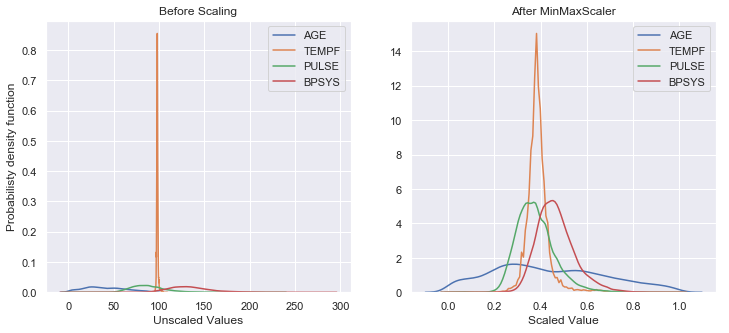

In [28]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
ax1.set_xlabel('Unscaled Values')
ax1.set_ylabel('Probabilisty density function')

for cols in ['AGE','TEMPF','PULSE','BPSYS']:
    sns.kdeplot(c_df[cols], ax=ax1)

ax2.set_title('After MinMaxScaler')
ax2.set_xlabel('Scaled Value')

for cols in ['AGE','TEMPF','PULSE','BPSYS']:
    sns.kdeplot(scaled_df[cols], ax=ax2)

plt.show()

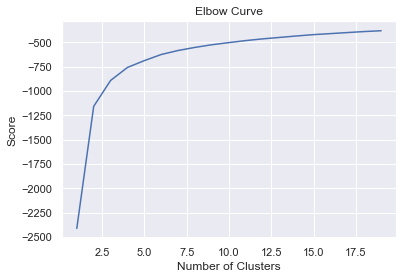

In [485]:
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)

In [32]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=1) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Triage Dataset");

In [33]:
kmeans.labels_

array([0, 2, 0, ..., 2, 1, 2], dtype=int32)

In [61]:
from pyclustertend import hopkins
"""
A statistical test which allow to guess if the data follow an uniform distribution. 
If the test is positve, (an hopkins score which tends to 0) it means that clustering
is useless for the dataset. A score between 0 and 1, a score around 0.5 express no 
clusterability and a score tending to 0 express a high cluster tendency.
"""
hopkins(scaled_df, len(scaled_df))

0.07091263991670256

In [34]:
X_scaled = scaled_df

In [35]:
from sklearn.cluster import KMeans

nclusters = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([4, 2, 3, ..., 2, 2, 0], dtype=int32)

In [36]:
km.score(X_scaled)

-685.9259039009835

In [494]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.22517054681108598

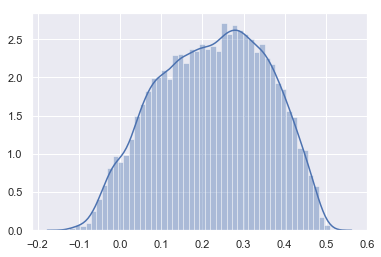

In [495]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

In [46]:
from sklearn.decomposition import PCA

ndimensions = 2 #change to 6 and see the scale how it works

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
#X_pca.sample(5)

In [47]:
len(pca.components_) 

2

In [48]:
#visualize doing 4 then take it down to 2.
pca.explained_variance_ratio_ #e

array([0.73840628, 0.11157968])

In [49]:
len(y_cluster_kmeans) 

29319

In [50]:

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot.sample(5)

PC1       PC2  ClusterKmeans
4798  -0.425854  0.065194              3
455    0.275905 -0.123465              2
18914  0.018490 -0.167380              0
24503  0.114890 -0.035414              2
487    0.028015 -0.054509              0

In [51]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=1,
                     alpha = 0.3
                    ) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Triage");

In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

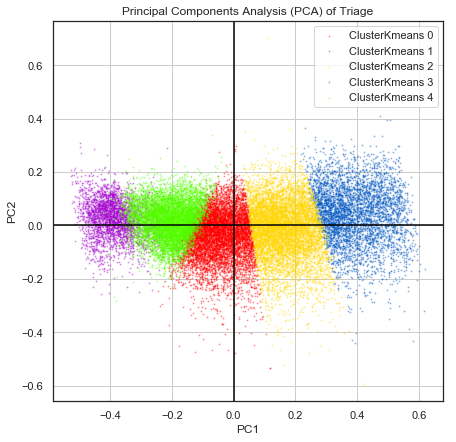

In [54]:
plotData(df_plot, 'ClusterKmeans')

In [55]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([3, 0, 1, ..., 3, 2, 3])

In [56]:
gmm.score(X_scaled) 

8.493974599804927

In [57]:
#work on visualizing it better

In [58]:
y_cluster_gmm

array([3, 0, 1, ..., 3, 2, 3])

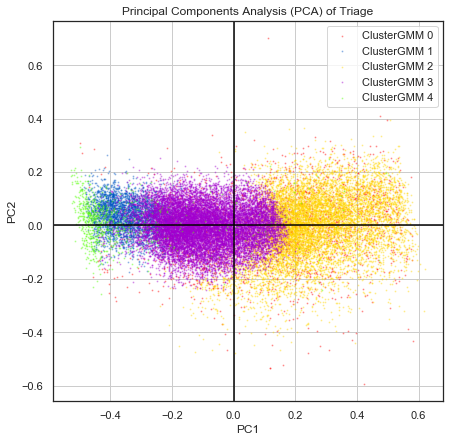

In [60]:
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [ ]:
Nc = range(1, 20)
gmm = [GaussianMixture(n_components=i) for i in Nc]
score = [gmm[i].fit(scaled_df).score(scaled_df) for i in range(len(gmm))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Log likelihood')
plt.title('Elbow Curve')
plt.show()

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(X_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
#add triage to this, and then see how the plots look like

In [ ]:
#predict proba for GMM

__Comparing with the actual triage levels__

In [63]:
t_df = df
t_df[triage_cols] = t_df[triage_cols].apply(pd.to_numeric, errors='coerce', axis=1) 

t_df
for cols in triage_cols: 
    t_df = t_df[t_df[cols].notna()]

#t_df = pd.DataFrame(scaler.fit_transform(t_df), columns=[cols for cols in t_df.columns])

In [64]:
c_df.columns

Index(['AGE', 'TEMPF', 'PULSE', 'RESPR', 'BPSYS', 'BPDIAS'], dtype='object')

In [65]:
t_df[['AGE','TEMPF','PULSE','RESPR','BPSYS','BPDIAS',
              ]] = pd.DataFrame(scaler.fit_transform(t_df[[cols for cols in c_df.columns]]))

In [66]:
triage_levels = ['Semi-urgent', 'Urgent', 'Emergent', 'Nonurgent', 'Immediate']
#d

In [67]:
triage_df = t_df[['AGE','TEMPF','PULSE','RESPR','BPSYS','BPDIAS','IMMEDR'
              ]]


In [68]:
triage_df.isna().sum() 

AGE       5347
TEMPF     5347
PULSE     5347
RESPR     5347
BPSYS     5347
BPDIAS    5347
IMMEDR       0
dtype: int64

In [69]:
triage_df.IMMEDR.unique()

array(['Semi-urgent', 'Urgent', 'Emergent', 'Immediate', 'Nonurgent',
       'Unknown', 'Blank',
       'No triage for this visit but ESA does conduct triage',
       'Visit occurred in ESA that does not conduct nursing triage'],
      dtype=object)

In [70]:
triage_df = triage_df[triage_df['IMMEDR'].isin(triage_levels)]

In [71]:
len(triage_df)

21840

In [72]:
triage_df.dropna(inplace=True)

In [73]:
#manual label encoding
triage_df.loc[triage_df.IMMEDR=='Nonurgent','IMMEDR'] = 1
triage_df.loc[triage_df.IMMEDR=='Semi-urgent','IMMEDR'] = 2
triage_df.loc[triage_df.IMMEDR=='Urgent','IMMEDR'] = 3
triage_df.loc[triage_df.IMMEDR=='Emergent','IMMEDR'] = 4
triage_df.loc[triage_df.IMMEDR=='Immediate','IMMEDR'] = 5



In [74]:
triage_df.IMMEDR.unique() 

array([2, 3, 4, 5, 1])

In [79]:
from sklearn.decomposition import PCA

ndimensions = 2 #change to 6 and see the scale how it works

pca1 = PCA(n_components=ndimensions, random_state=seed)
t_scaled = triage_df.drop('IMMEDR', axis=1) #dropping the class
pca1.fit(t_scaled)

t_pca_array = pca.transform(t_scaled)

t_pca = pd.DataFrame(t_pca_array, columns=['PC1','PC2']) # PC=principal component
t_pca.sample(5)

triage_plot = t_pca.copy()


In [80]:
triage = triage_df.IMMEDR.to_list() 

In [81]:
triage_plot['Triage'] = triage

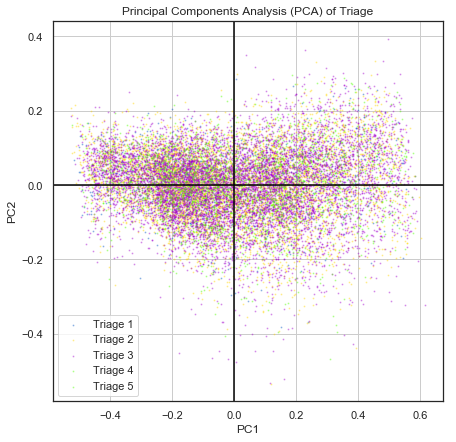

In [82]:
plotData(triage_plot, 'Triage')

In [78]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(t_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(t_scaled)
y_cluster_gmm

triage_plot['ClusterGMM'] = y_cluster_gmm
plotData(triage_plot, 'ClusterGMM')

NameError: name 't_scaled' is not defined

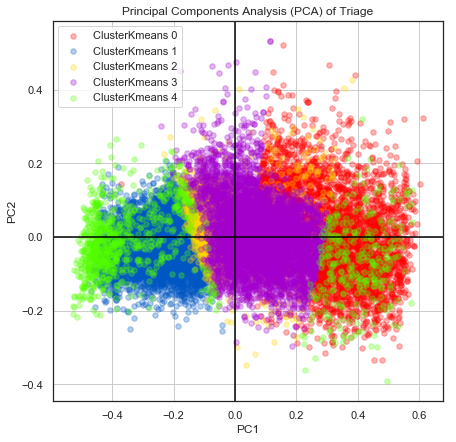

In [517]:
from sklearn.cluster import KMeans

nclusters = 5# this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(t_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(t_scaled)
triage_plot['ClusterKmeans'] = y_cluster_kmeans

plotData(triage_plot, 'ClusterKmeans')

In [403]:
metrics.silhouette_score(X_scaled, y_cluster_kmeans)

ValueError: Found input variables with inconsistent numbers of samples: [29319, 18013]

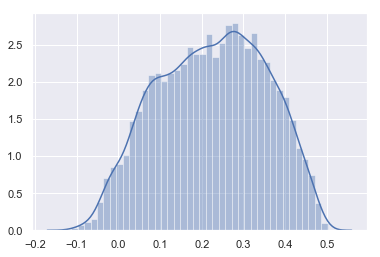

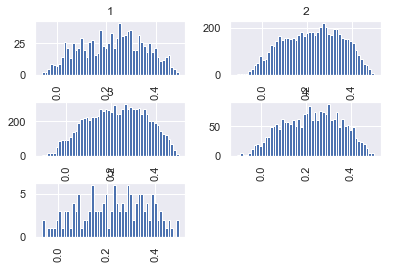

In [401]:
scores = metrics.silhouette_samples(t_scaled, y_cluster_kmeans)
sns.distplot(scores);


# can we add the species info to that plot?
# well, can plot them separately using pandas - 
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Triage'] = triage_plot['Triage']
df_scores.hist(by='Triage', column='SilhouetteScore', bins=50);

In [388]:
triage_plot.groupby('Triage').size() 

Triage
1     978
2    5976
3    8743
4    2172
5     144
dtype: int64

In [389]:
triage_plot.groupby('ClusterKmeans').size() 

ClusterKmeans
0    4588
1    4503
2    2609
3    1699
4    4614
dtype: int64

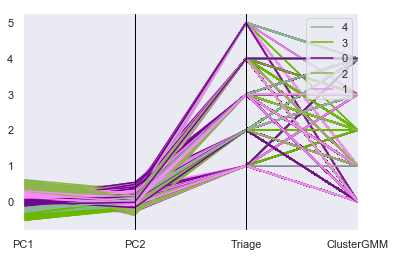

In [407]:
pd.plotting.parallel_coordinates(triage_plot, 'ClusterKmeans')

In [421]:
len(triage_plot) - len(triage_df)

0

In [411]:
parallel_plot = triage_df
parallel_plot['ClusterKmeans'] = y_cluster_kmeans

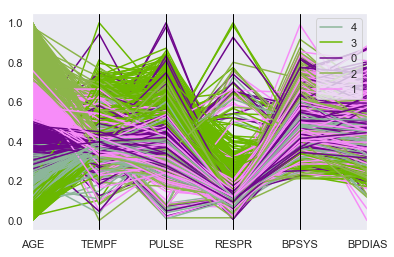

In [413]:
pd.plotting.parallel_coordinates(parallel_plot.drop('IMMEDR',axis=1)
                                                    , 'ClusterKmeans')

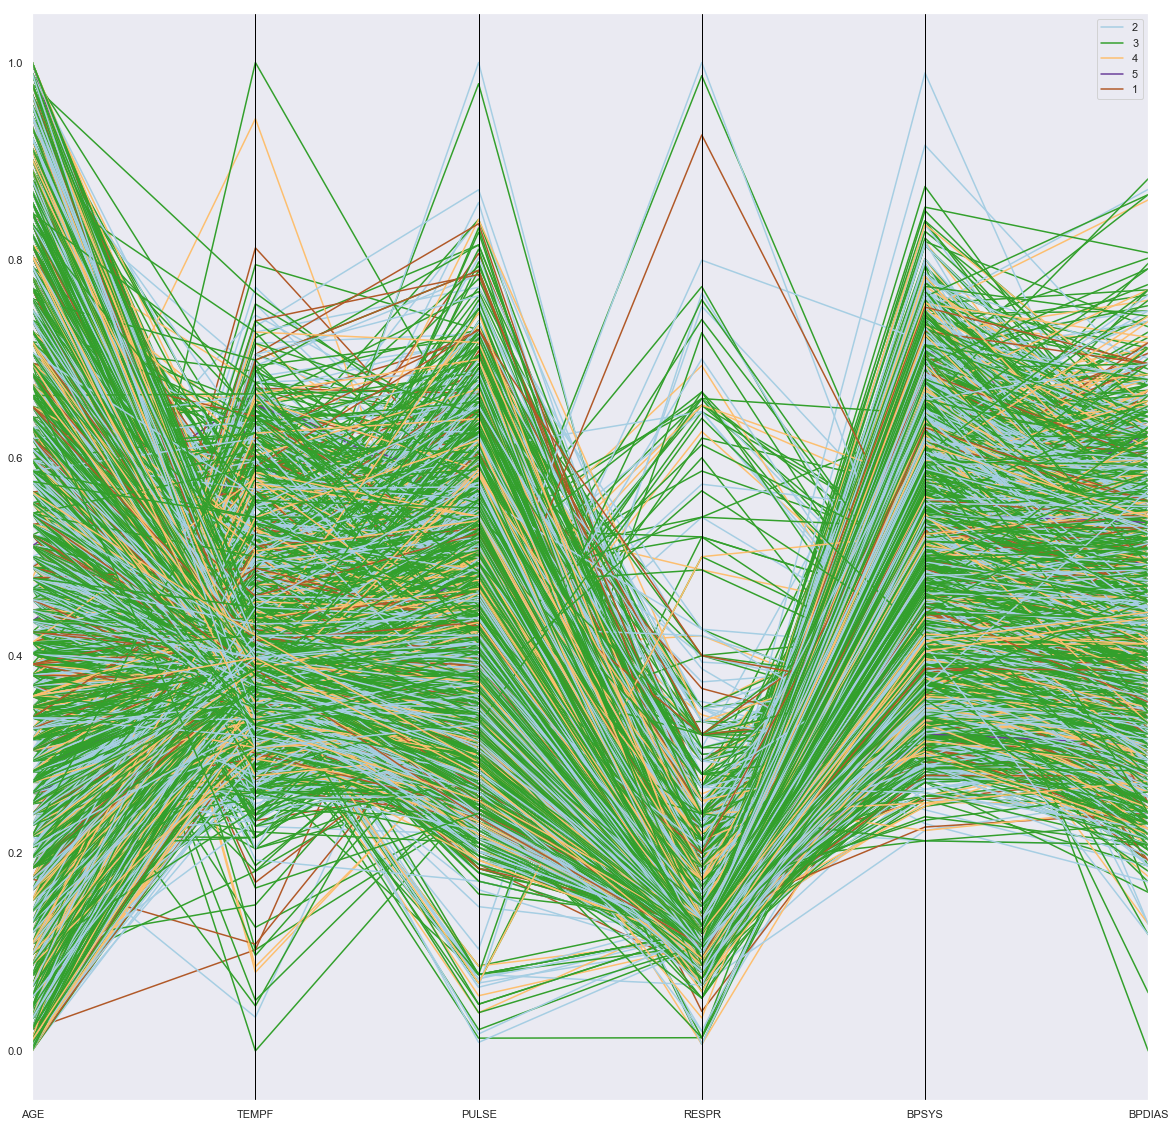

In [417]:
plt.figure(figsize=(20,20))
pd.plotting.parallel_coordinates(parallel_plot.drop('ClusterKmeans',axis=1)
                                 , 'IMMEDR',
                                 colormap= "Paired"
                                )
plt.show() 

In [418]:
#parallel_plot['ClusterKmeans'] = y_cluster_kmeans
parallel_plot['ClusterGMM'] = y_cluster_gmm

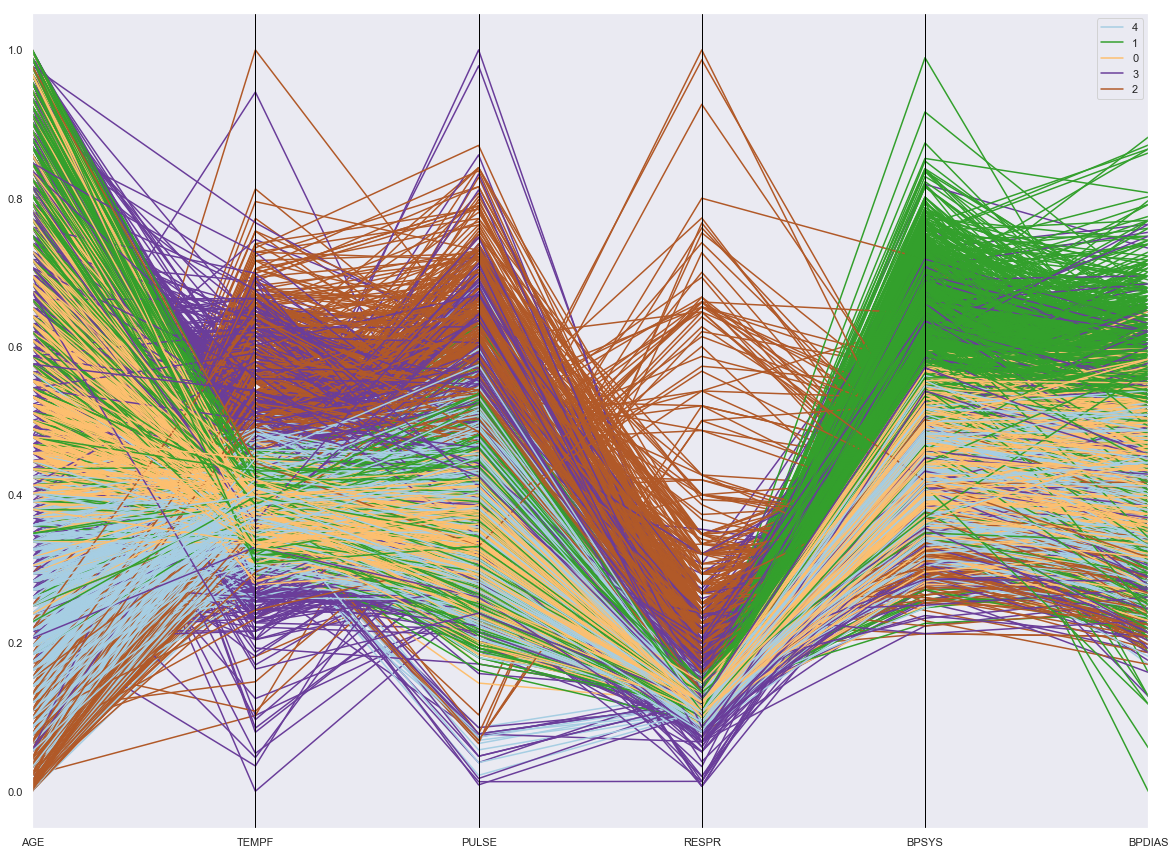

In [422]:
#plotting by ClusterGMM
plt.figure(figsize=(20,15))
pd.plotting.parallel_coordinates(parallel_plot.drop(['ClusterKmeans','IMMEDR'],axis=1)
                                 , 'ClusterGMM',
                                 colormap= "Paired"
                                )
plt.show() 

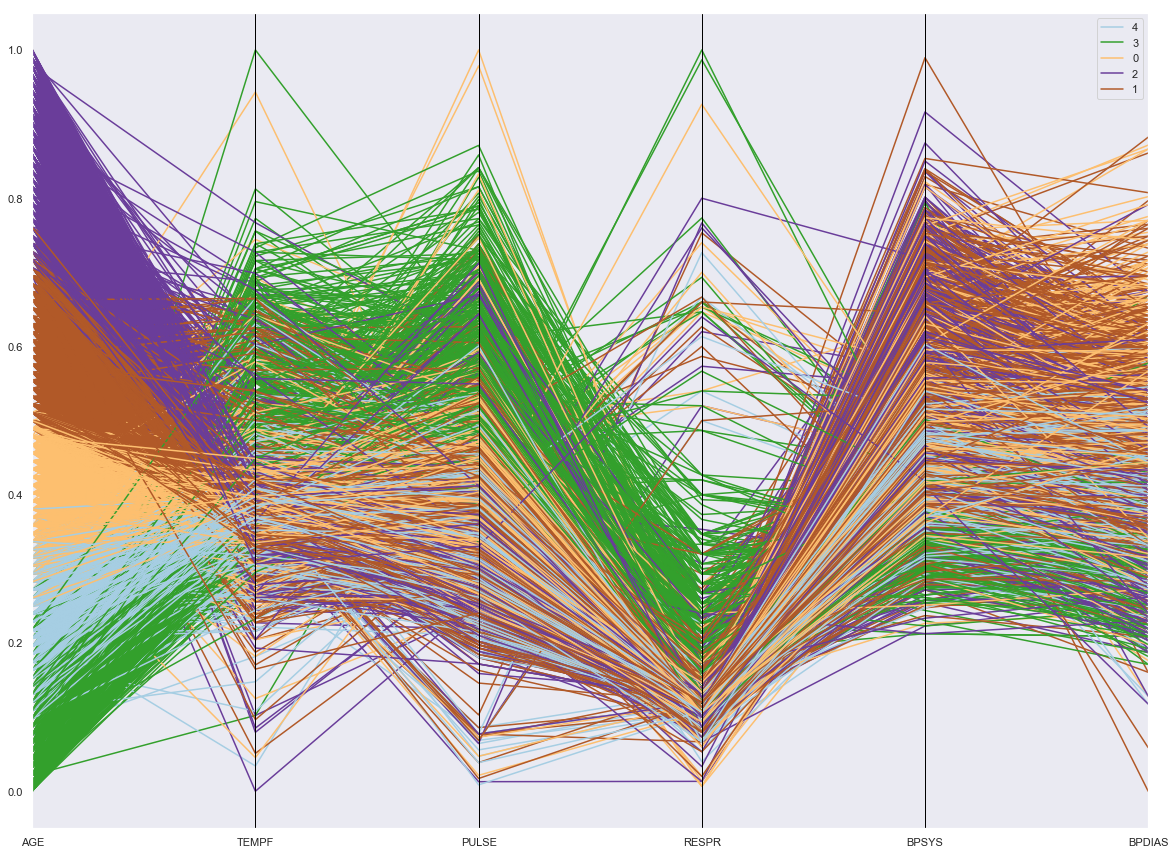

In [423]:
plt.figure(figsize=(20,15))
pd.plotting.parallel_coordinates(parallel_plot.drop(['ClusterGMM','IMMEDR'],axis=1)
                                 , 'ClusterKmeans',
                                 colormap= "Paired"
                                )
plt.show() 